## M1 - Model prediksi titik panas di Sumatera Selatan 2001 - 2023

In [1]:
# load all functions
from C01_data_collection import *
from C02_visualization import *
from C03_preprocessing import *
# from C04_model_predictions import *
# from C05_model_evaluate import *

- config models

In [2]:
# set random number
import random as rm
rm.seed(1234)

# set random number
import numpy as np
np.random.seed(1234)

# set random number
import tensorflow as tf
tf.random.set_seed(1234)

### 1. Akuisisi Data

In [3]:
# load dataset
dataset = data_hotspot("dataset_enso.csv")
print(dataset.tail())

      acq_date  hotspot  sst_anom  oni_anom  soi_anom
271 2023-08-31      186      1.30      1.32      -1.4
272 2023-09-30     2247      1.53      1.56      -2.1
273 2023-10-31     3200      1.59      1.78      -0.8
274 2023-11-30      390      1.90      1.92      -1.3
275 2023-12-31       42      1.99      1.97      -0.4


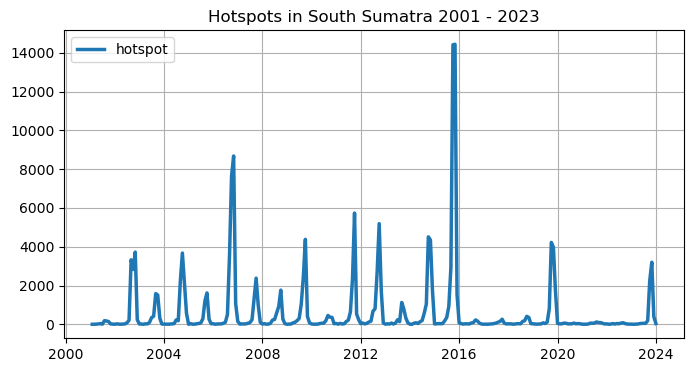

In [4]:
# hasil load dataset
lineplot1(x=dataset["acq_date"], y=dataset["hotspot"], label="hotspot", title="Hotspots in South Sumatra 2001 - 2023")

### 2. Praproses Data

In [5]:
# proses normalisasi min-max
scaler, scaled = normalized(dataset, ["hotspot"])

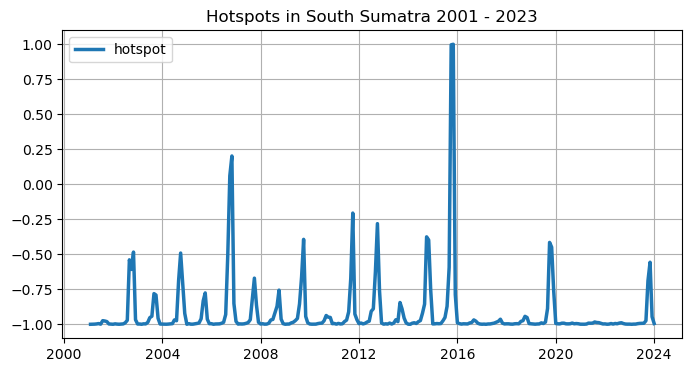

In [6]:
# hasil normalisasi min-max
lineplot1(x=dataset["acq_date"], y=scaled, label="hotspot", title="Hotspots in South Sumatra 2001 - 2023")

### 3. Pembagian Data

In [7]:
# proses pembagian data
train_data, test_data = splitting(scaled)
print(train_data.shape, test_data.shape)

(216, 1) (60, 1)


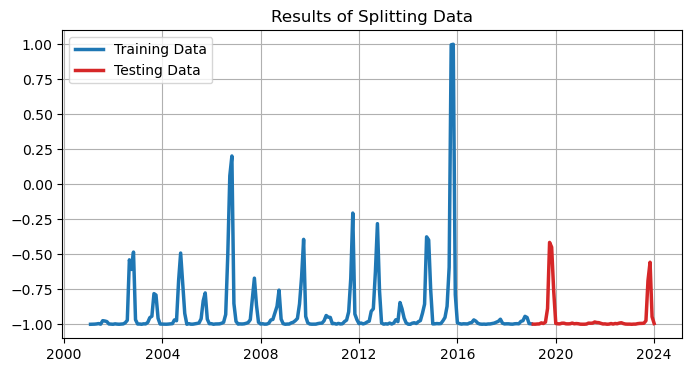

In [8]:
# hasil pembagian data
lineplot2(
  x1=dataset["acq_date"].iloc[:len(train_data)], y1= train_data, label1="Training Data",
  x2=dataset["acq_date"].iloc[len(train_data):], y2=test_data, label2="Testing Data",
  title="Results of Splitting Data"
)